# Track Analysis
Goals
- Analyze characteristic relationships
- Define meaningful characteristics and their impact on streams

In [40]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [41]:
# Load in the merged data
streaming_df = pd.read_csv('/Users/joseflemker/Documents/GitHub/3250-data-analytics-template/data/finished/merged_data_finished.csv', encoding='utf-8')

In [42]:
# Fist I want to see correlations for some of our columns
# Select columns for correlation matrix
corr_test_df = streaming_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo','total_streams', 'daily_streams']]

# Create the matrix
corr_matrix = corr_test_df.corr()

# Display Matrix
print(corr_matrix)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.037426  0.184883     0.129296     -0.119421   
energy                0.037426  1.000000  0.683548     0.066803     -0.622634   
loudness              0.184883  0.683548  1.000000     0.049419     -0.469979   
speechiness           0.129296  0.066803  0.049419     1.000000     -0.020579   
acousticness         -0.119421 -0.622634 -0.469979    -0.020579      1.000000   
instrumentalness     -0.159618 -0.006692 -0.182932    -0.028787      0.071213   
valence               0.458636  0.408906  0.317642     0.026557     -0.253900   
tempo                -0.106815  0.125287  0.089650     0.108305     -0.085473   
total_streams         0.071985 -0.000226  0.086035    -0.007819     -0.017252   
daily_streams        -0.075329  0.030831  0.002539    -0.086756     -0.005117   

                  instrumentalness   valence     tempo  total_streams  \
danceability             -0.159618 

Lets Plot our features with a notable correlation

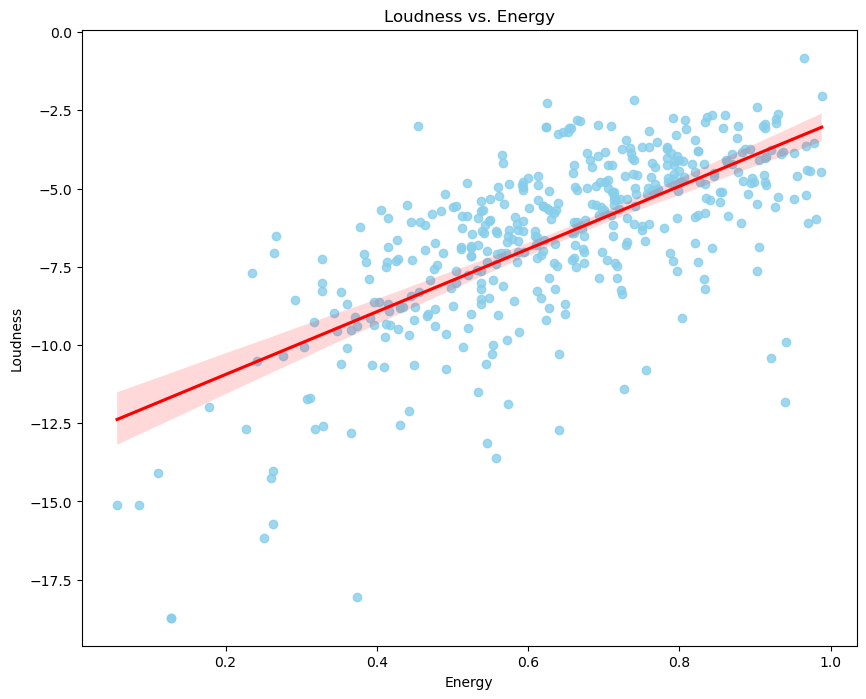

In [43]:
# Scatter plot of loudness vs. energy
plt.figure(figsize=(10, 8))
sns.regplot(data=streaming_df, x='energy', y='loudness', line_kws={"color": "red"}, color='skyblue')
plt.title('Loudness vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

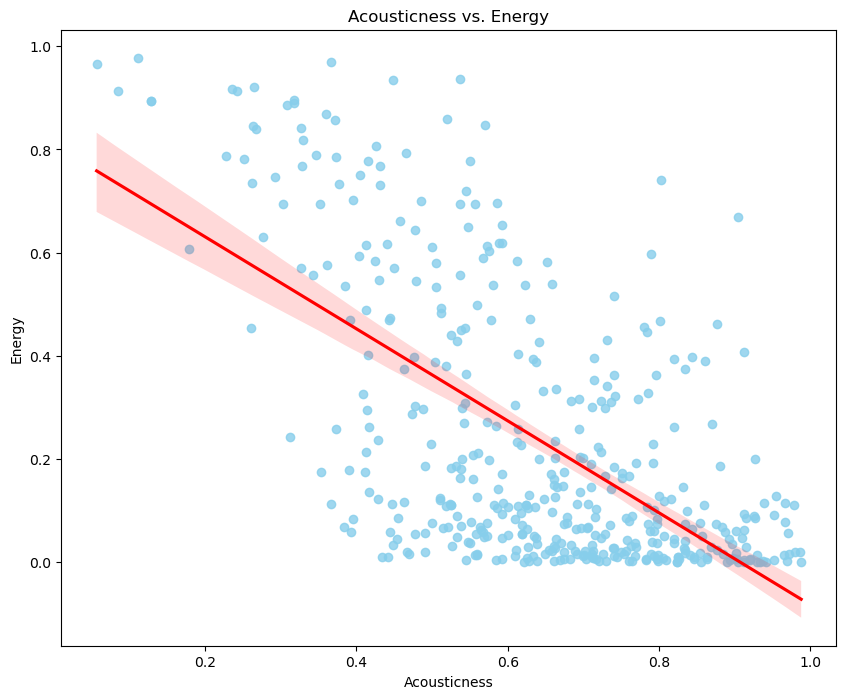

In [44]:
# Scatter plot of acousticness vs. energy
plt.figure(figsize=(10, 8))
sns.regplot(data=streaming_df, x='energy', y='acousticness', line_kws={"color": "red"}, color='skyblue')
plt.title('Acousticness vs. Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

In [45]:
# Now looking into correlation within genre
# Define new genre groups
genre_mapping = {
    'Pop': ['pop'],
    'Hip Hop/Rap': ['hip hop', 'rap'],
    'Rock': ['rock'],
    'Indie/Alternative': ['indie', 'alternative', 'alt'],
    'R&B': ['r&b'],
    'Folk': ['folk'],
    'Reggae': ['reggae'],
    'Dance': ['dance', 'edm', 'electro', 'house'],
    'Instrumental': ['lo-fi', 'instrumental', 'ambient'],
}

In [46]:
# Now actually iterate through and add the new column
def map_genre(genre):
    for group, keywords in genre_mapping.items():
        if any(keyword in genre.lower() for keyword in keywords):
            return group
    return 'Other'  

# Apply the mapping function to create a new column
streaming_df['genre_group'] = streaming_df['genre'].apply(map_genre)

In [47]:
# Drop rows where genre_group is 'Other'
streaming_df = streaming_df[streaming_df['genre_group'] != 'Other']

In [48]:
# Split into Pop genre
pop_df = streaming_df[streaming_df['genre_group'] == 'Pop']
# Select columns for correlation matrix
corr_test_dfPop = pop_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo','total_streams', 'daily_streams']]

# Create the matrix
corr_matrixPop = corr_test_dfPop.corr()

# Display Matrix
print(corr_matrixPop)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.265912  0.363163     0.163120     -0.321727   
energy                0.265912  1.000000  0.725864     0.046852     -0.670468   
loudness              0.363163  0.725864  1.000000     0.027599     -0.541950   
speechiness           0.163120  0.046852  0.027599     1.000000     -0.065347   
acousticness         -0.321727 -0.670468 -0.541950    -0.065347      1.000000   
instrumentalness     -0.281630 -0.042528 -0.229413    -0.052994      0.106232   
valence               0.589578  0.495488  0.486440     0.080387     -0.374317   
tempo                -0.052711  0.103013  0.088189     0.099958     -0.041131   
total_streams         0.064109 -0.005497  0.079681    -0.031086      0.098561   
daily_streams        -0.025694 -0.011111 -0.061723    -0.077531      0.069347   

                  instrumentalness   valence     tempo  total_streams  \
danceability             -0.281630 

In [49]:
# Split into Rock genre
rock_df = streaming_df[streaming_df['genre_group'] == 'Rock']
# Select columns for correlation matrix
corr_test_dfRock = rock_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo','total_streams', 'daily_streams']]

# Create the matrix
corr_matrixRock = corr_test_dfRock.corr()

# Display Matrix
print(corr_matrixRock)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.062401  0.113988     0.070459     -0.051325   
energy                0.062401  1.000000  0.728256     0.370659     -0.352262   
loudness              0.113988  0.728256  1.000000     0.213542     -0.386697   
speechiness           0.070459  0.370659  0.213542     1.000000     -0.010537   
acousticness         -0.051325 -0.352262 -0.386697    -0.010537      1.000000   
instrumentalness     -0.100189 -0.053779 -0.153938    -0.115482      0.102639   
valence               0.468534  0.286304  0.193613     0.173291     -0.131975   
tempo                -0.168871  0.349468  0.244061     0.209142     -0.212675   
total_streams         0.084938 -0.198600  0.062863    -0.008798     -0.167403   
daily_streams        -0.035697 -0.259526 -0.010246    -0.147318     -0.147485   

                  instrumentalness   valence     tempo  total_streams  \
danceability             -0.100189 

In [50]:
# Split into Hip Hop genre
rap_df = streaming_df[streaming_df['genre_group'] == 'Hip Hop/Rap']
# Select columns for correlation matrix
corr_test_dfRap = rap_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo','total_streams', 'daily_streams']]

# Create the matrix
corr_matrixRap = corr_test_dfRap.corr()

# Display Matrix
print(corr_matrixRap)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.132051 -0.046472    -0.053480     -0.109914   
energy               -0.132051  1.000000  0.781920     0.217609     -0.355413   
loudness             -0.046472  0.781920  1.000000     0.021367     -0.263766   
speechiness          -0.053480  0.217609  0.021367     1.000000      0.047846   
acousticness         -0.109914 -0.355413 -0.263766     0.047846      1.000000   
instrumentalness      0.000077 -0.228691 -0.353974     0.105764     -0.150431   
valence               0.306561  0.330921  0.364690     0.093166     -0.035022   
tempo                 0.077479 -0.023958  0.061868     0.306077      0.117766   
total_streams         0.408530  0.003436 -0.031391    -0.082179     -0.130262   
daily_streams         0.232801  0.082846 -0.041183     0.080839     -0.033980   

                  instrumentalness   valence     tempo  total_streams  \
danceability              0.000077 

In [51]:
# Split into Indie genre
indie_df = streaming_df[streaming_df['genre_group'] == 'Indie/Alternative']
# Select columns for correlation matrix
corr_test_dfIndie = indie_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo','total_streams', 'daily_streams']]

# Create the matrix
corr_matrixIndie = corr_test_dfIndie.corr()

# Display Matrix
print(corr_matrixIndie)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.358318 -0.328135    -0.043032      0.421029   
energy               -0.358318  1.000000  0.890902     0.121396     -0.738375   
loudness             -0.328135  0.890902  1.000000     0.062084     -0.711594   
speechiness          -0.043032  0.121396  0.062084     1.000000      0.039760   
acousticness          0.421029 -0.738375 -0.711594     0.039760      1.000000   
instrumentalness      0.062337 -0.247152 -0.306929    -0.148652      0.248601   
valence               0.376047  0.383088  0.336830     0.264425     -0.272640   
tempo                -0.282475  0.184097  0.170020    -0.119319     -0.423153   
total_streams        -0.116630  0.060390  0.035215    -0.110363     -0.042480   
daily_streams        -0.242485  0.189805  0.144125    -0.149016     -0.055914   

                  instrumentalness   valence     tempo  total_streams  \
danceability              0.062337 

Similar to how I analyzed the top and bottom 10 artists I will now look into the top and bottom 25 tracks

In [52]:
# Looking at song characteristics of top tracks vs bottom tracks
# Save the top and bottom 10 by average streams
top_tracks = streaming_df.sort_values(by='total_streams', ascending=False).head(25)
bottom_tracks = streaming_df.sort_values(by='total_streams', ascending=False).tail(25)

In [53]:
combined_tracks

,track_name,artist_name,total_streams,daily_streams,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_group,track_group
0,Blinding Lights,The Weeknd,4.560740e+09,1912741.0,canadian contemporary r&b,0.514,0.730,1.0,-5.934,1.0,0.0598,0.001460,0.000095,0.0897,0.334,171.005,200040.0,1.0,R&B,Top
1,Shape of You,Ed Sheeran,4.096124e+09,1615655.0,pop,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713.0,1.0,Pop,Top
2,Someone You Loved,Lewis Capaldi,3.671557e+09,1475856.0,pop,0.501,0.405,1.0,-5.679,1.0,0.0319,0.751000,0.000000,0.1050,0.446,109.891,182161.0,1.0,Pop,Top
3,As It Was,Harry Styles,3.631721e+09,1533219.0,pop,0.520,0.731,6.0,-5.338,0.0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303.0,6.0,Pop,Top
4,Starboy,The Weeknd,3.580695e+09,1852199.0,canadian contemporary r&b,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141000,0.000006,0.1370,0.486,186.003,230453.0,7.0,R&B,Top
5,One Dance,Drake,3.415975e+09,1335061.0,canadian hip hop,0.792,0.625,1.0,-5.609,1.0,0.0536,0.007760,0.001800,0.3290,0.370,103.967,173987.0,1.0,Hip Hop/Rap,Top
6,Sweater Weather,The Neighbourhood,3.347043e+09,2882322.0,modern alternative rock,0.612,0.807,10.0,-2.810,1.0,0.0336,0.049500,0.017700,0.1010,0.398,124.053,240400.0,10.0,Rock,Top
7,Heat Waves,Glass Animals,3.195907e+09,1085484.0,gauze pop,0.761,0.525,11.0,-6.900,1.0,0.0944,0.440000,0.000007,0.0921,0.531,80.870,238805.0,11.0,Pop,Top
8,Say You Won't Let Go,James Arthur,3.058175e+09,1706170.0,pop,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695000,0.000000,0.0902,0.494,85.043,211467.0,10.0,Pop,Top
9,Watermelon Sugar,Harry Styles,2.876387e+09,726734.0,pop,0.548,0.816,0.0,-4.209,1.0,0.0465,0.122000,0.000000,0.3350,0.557,95.390,174000.0,0.0,Pop,Top


In [54]:
# Save the top and bottom 25 tracks based on total streams
top_tracks = streaming_df.sort_values(by='total_streams', ascending=False).head(25)
bottom_tracks = streaming_df.sort_values(by='total_streams', ascending=False).tail(25)

# Add a column to label the tracks as 'Top' or 'Bottom'
top_tracks['track_group'] = 'Top'
bottom_tracks['track_group'] = 'Bottom'

# Combine the top and bottom tracks into one DataFrame
combined_tracks = pd.concat([top_tracks, bottom_tracks])

# Print the melted DataFrame
print(combined_tracks)


                                  track_name               artist_name  \
0                            Blinding Lights                The Weeknd   
1                               Shape of You                Ed Sheeran   
2                          Someone You Loved             Lewis Capaldi   
3                                  As It Was              Harry Styles   
4                                    Starboy                The Weeknd   
5                                  One Dance                     Drake   
6                            Sweater Weather         The Neighbourhood   
7                                 Heat Waves             Glass Animals   
8                       Say You Won't Let Go              James Arthur   
9                           Watermelon Sugar              Harry Styles   
10                  Something Just Like This          The Chainsmokers   
11                                  Señorita              Shawn Mendes   
12                                   R

In [55]:
# Select only numeric columns
numeric_cols = combined_tracks.select_dtypes(include='number').columns

# Group by track group and calculate the mean for numeric features
track_comparison_df = combined_tracks.groupby('track_group', as_index=False)[numeric_cols].mean()

# Melt the DataFrame into long format for visualization
melted_df = track_comparison_df.melt(
    id_vars=['track_group'],
    value_vars=[
        'danceability', 'energy', 'liveness', 
        'valence', 'speechiness', 'acousticness', 'instrumentalness'
    ],
    var_name='Feature',
    value_name='Average Value'
)

print(melted_df)


   track_group           Feature  Average Value
0       Bottom      danceability       0.621200
1          Top      danceability       0.629360
2       Bottom            energy       0.664520
3          Top            energy       0.604720
4       Bottom          liveness       0.182080
5          Top          liveness       0.184552
6       Bottom           valence       0.454880
7          Top           valence       0.474800
8       Bottom       speechiness       0.058732
9          Top       speechiness       0.065620
10      Bottom      acousticness       0.312949
11         Top      acousticness       0.258008
12      Bottom  instrumentalness       0.061043
13         Top  instrumentalness       0.012402


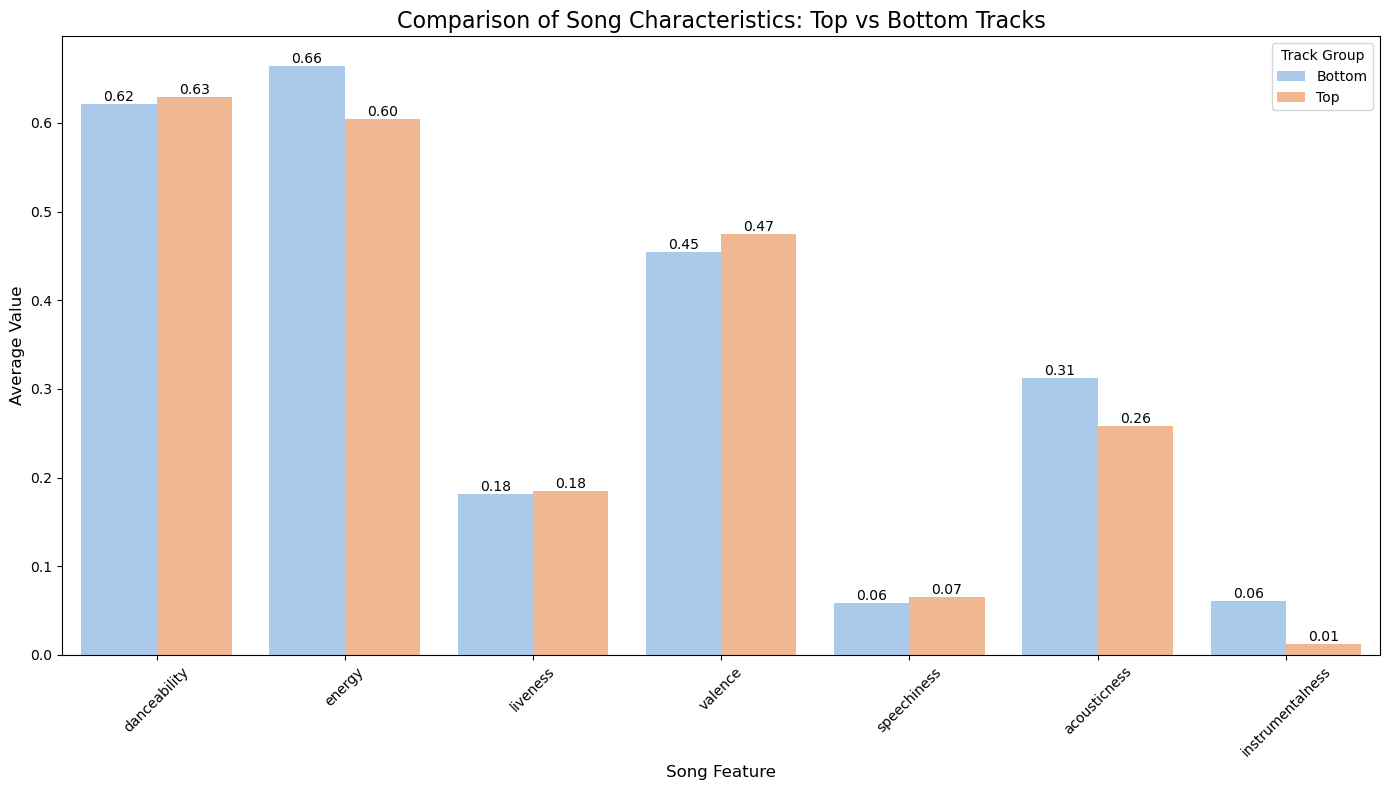

In [56]:
# Visualization
plt.figure(figsize=(14, 8))

# Bar plot to compare Top vs Bottom track characteristics
ax = sns.barplot(
    data=melted_df,
    x='Feature',
    y='Average Value',
    hue='track_group',
    palette='pastel',
    errorbar=None
)

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=10)

# Add titles and labels
plt.title('Comparison of Song Characteristics: Top vs Bottom Tracks', fontsize=16)
plt.xlabel('Song Feature', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Track Group', loc='upper right')
plt.tight_layout()

plt.show()
